**Description**
**Background and Context**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

**Objective**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

**Data Description**

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:

*   images.npy
*   Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Plant species**

*   Black-grass
*   Charlock
*   Cleavers
*   Common Chickweed
*   Common Wheat
*   Fat Hen
*   Loose Silky-bent
*   Maize
*   Scentless Mayweed
*   Shepherds Purse
*   Small-flowered Cranesbill
*   Sugar beet
*   Guide to solve the project seamlessly


**Importing the necessary libraries**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the dataset**

In [28]:
#load the image file
images = np.load("drive/MyDrive/UTAustin-AIML/vision/images.npy")
#load the labels file
labels = pd.read_csv("Labels.csv")

**Overview of the dataset**

In [29]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.

**Plotting images using OpenCV and matplotlib**

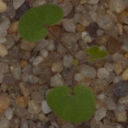

In [30]:
cv2_imshow(images[6])

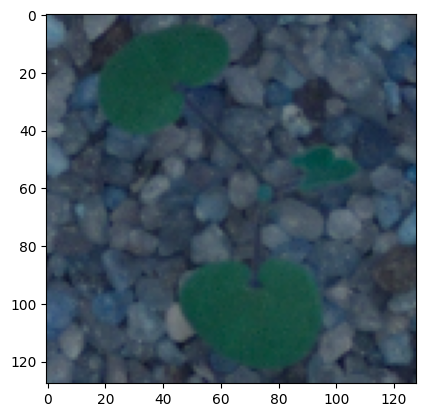

In [31]:
plt.imshow(images[6])


*   We can observe that the images are being shown in different colors when plotted with openCV and matplotlib. This is because OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
*   Now we will convert these BGR images to RGB images so we could interpret them easily.



In [32]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

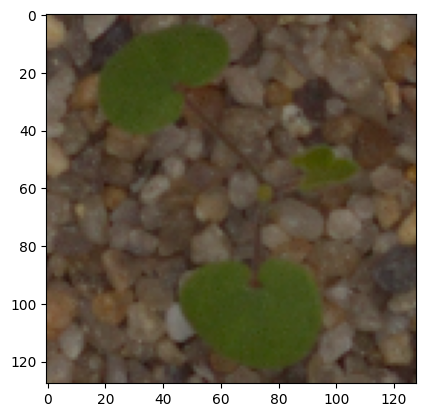

In [33]:
plt.imshow(images[6])

Now the image colors shown by matplotlib is with same color

**Exploratory Data Analysis**

In [34]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

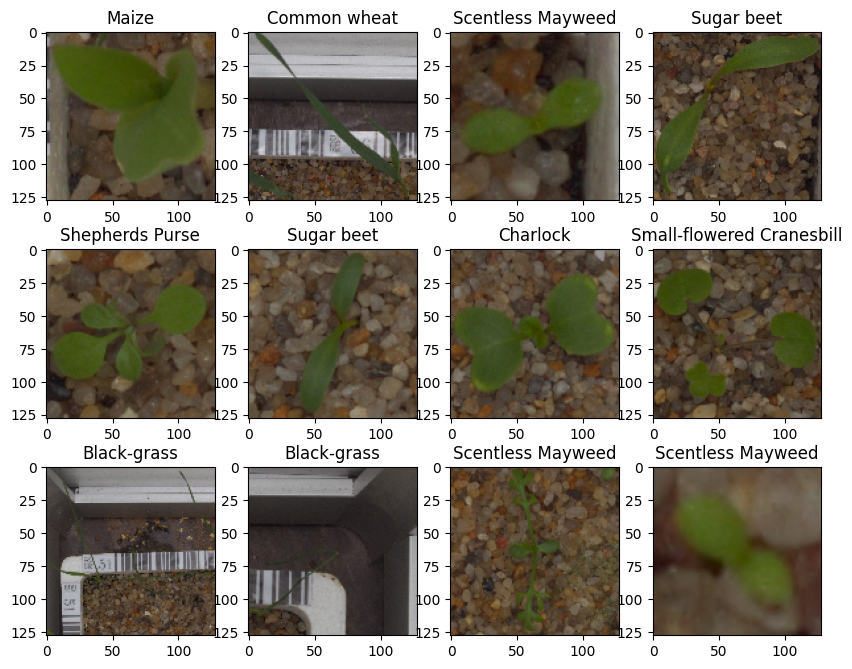

In [35]:
plot_images(images,labels)

**Check for data balance**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

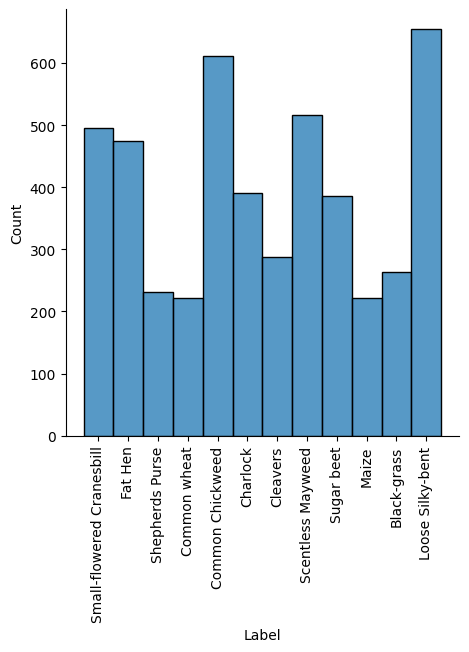

In [36]:
sns.displot(labels['Label'])
plt.xticks(rotation='vertical')

*   As you can see from the above plot, the dataset is NOT quite balanced.
*   There are more 'Loose Silky-bent' label than other labels
*   We will use the following code to balance the labels, by increasing the weights of the minority classes

**Resizing images** 

*   The size of the images is large, it may be computationally expensive to train on those large images. 
*   Therefore, it is preferrable to reduce the image size from 128 to 64
*   Note that the image resolution will change




In [37]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))


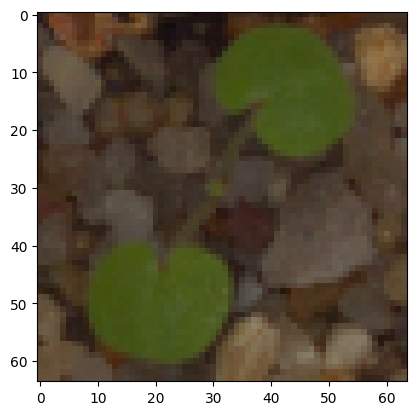

In [38]:
plt.imshow(images_decreased[5])

**Visualizing images using Gaussian Blur**

In [39]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

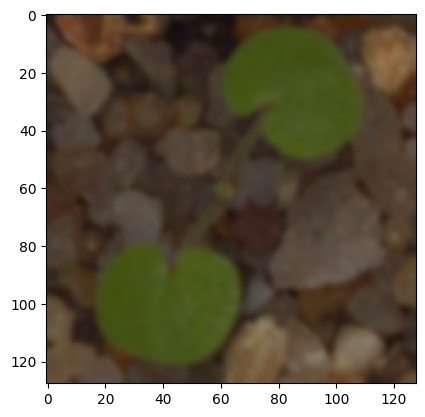

In [40]:
plt.imshow(images_gb[5])


It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

Splitting the dataset

*   As we have less images in our dataset, we will only use 10% of our data for 
testing, 10% of our data for validation and 80% of our data for training.
*   We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [41]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


**Blance the label set**

*   The below code can be used to treat the class imbalance by increasing the weights of the minority classes.



In [72]:
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7974709784411277,
 1: 0.8348524305555556,
 2: 1.714349376114082,
 3: 1.7909683426443204,
 4: 0.6476430976430977,
 5: 1.0145042194092826,
 6: 1.3818247126436782,
 7: 0.7669457735247209,
 8: 1.0275106837606838,
 9: 1.7909683426443204,
 10: 1.5050860719874803,
 11: 0.604874213836478}

In [50]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


**Making the data compatible**   

*   Convert labels from names to one hot vectors
*   Normalizing the values



**Encoding the target labels**

In [51]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

**Data Normalization**

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [52]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

**Model Building - Convolutional Neural Network (CNN)**

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [53]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [54]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a CNN Model with the following 2 main parts -



*   The Feature Extraction layers which are comprised of convolutional and pooling layers.
*   The Fully Connected classification layers for prediction.

In [61]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

**Fitting the model on the train data**

In [73]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2,
            class_weight=class_weights
)

Epoch 1/30
121/121 - 3s - loss: 2.8222 - accuracy: 0.1573 - val_loss: 2.3076 - val_accuracy: 0.2477 - 3s/epoch - 22ms/step
Epoch 2/30
121/121 - 1s - loss: 2.4438 - accuracy: 0.2787 - val_loss: 1.9311 - val_accuracy: 0.3668 - 711ms/epoch - 6ms/step
Epoch 3/30
121/121 - 1s - loss: 2.1041 - accuracy: 0.3421 - val_loss: 1.7514 - val_accuracy: 0.4112 - 711ms/epoch - 6ms/step
Epoch 4/30
121/121 - 1s - loss: 1.9155 - accuracy: 0.3917 - val_loss: 1.5712 - val_accuracy: 0.4276 - 714ms/epoch - 6ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7937 - accuracy: 0.4190 - val_loss: 1.5532 - val_accuracy: 0.4790 - 714ms/epoch - 6ms/step
Epoch 6/30
121/121 - 1s - loss: 1.7317 - accuracy: 0.4349 - val_loss: 1.4406 - val_accuracy: 0.5257 - 722ms/epoch - 6ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6703 - accuracy: 0.4546 - val_loss: 1.3360 - val_accuracy: 0.5421 - 729ms/epoch - 6ms/step
Epoch 8/30
121/121 - 1s - loss: 1.6222 - accuracy: 0.4648 - val_loss: 1.3230 - val_accuracy: 0.5140 - 727ms/epoch - 6ms/step
Ep

**Model Evaluation**

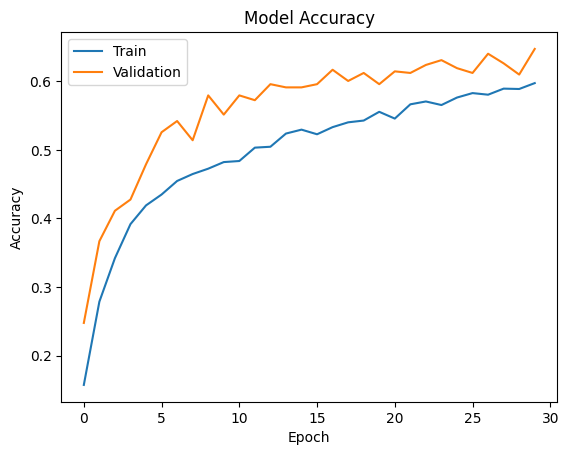

In [74]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that the validation accuracy of the model was good but the training accuracy was not good.
*   The model seems to underfit on the data.

**Evaluating the model on test data**


In [75]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 0s - loss: 1.1691 - accuracy: 0.6316 - 176ms/epoch - 12ms/step


**Generating the predictions using test data**

In [76]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


In [77]:
y_pred

array([[3.5293857e-10, 3.5037855e-13, 1.6240739e-14, ..., 4.4454574e-03,
        4.6935519e-08, 3.8664868e-05],
       [7.1195073e-16, 8.9740202e-02, 1.6548393e-02, ..., 1.9913132e-01,
        6.9432914e-01, 1.9328164e-04],
       [4.0023315e-12, 9.5826236e-04, 5.7605924e-03, ..., 8.1601469e-03,
        9.8296952e-01, 1.3649126e-03],
       ...,
       [1.7253700e-01, 6.6318724e-04, 9.9529093e-03, ..., 1.4387468e-05,
        5.5356933e-05, 1.6225250e-02],
       [1.2104437e-06, 2.0556135e-05, 2.2111615e-05, ..., 1.5406820e-01,
        9.8966666e-07, 4.7903829e-03],
       [2.1076160e-06, 2.1206620e-01, 9.2441738e-02, ..., 3.7915009e-01,
        2.5753948e-01, 2.3455126e-02]], dtype=float32)

**Plotting the Confusion Matrix**



*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

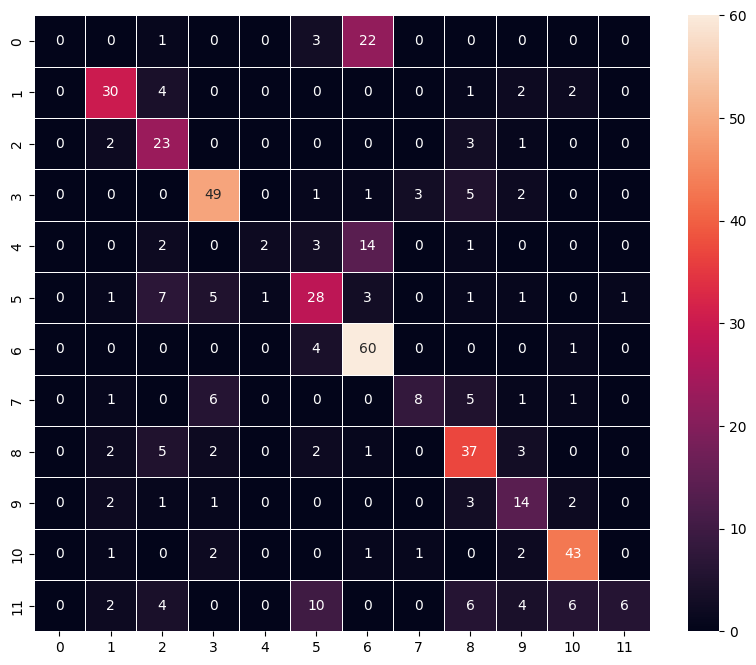

In [78]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations**



*   We observe that some of the classes are not predicted correctly.
*   In comparison to the rest, we can see that classes 1,2,3, 4, 5,7, 8,9, 10,and 11 are well classified.
*   We can also observe that classes 6 is mostly misclassified.

**Model-2**

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

**Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is Data Augmentation. CNNs have the property of translational invariance, which means they can recognise an object even if its appearance shifts translationally in some way.
Taking this attribute into account, we can augment the images using the techniques listed below -
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

Remember, data augmentation should not be used in the validation/test data set.

In [79]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [80]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [81]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [83]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,
                    class_weight=class_weights)

Epoch 1/25
60/60 [==============================] - 8s 83ms/step - loss: 2.5163 - accuracy: 0.2524 - val_loss: 2.3873 - val_accuracy: 0.1565
Epoch 2/25
60/60 [==============================] - 4s 75ms/step - loss: 1.8898 - accuracy: 0.3859 - val_loss: 2.2893 - val_accuracy: 0.2056
Epoch 3/25
60/60 [==============================] - 7s 120ms/step - loss: 1.6361 - accuracy: 0.4592 - val_loss: 2.2127 - val_accuracy: 0.2079
Epoch 4/25
60/60 [==============================] - 5s 77ms/step - loss: 1.5439 - accuracy: 0.4851 - val_loss: 2.0641 - val_accuracy: 0.3972
Epoch 5/25
60/60 [==============================] - 6s 106ms/step - loss: 1.3996 - accuracy: 0.5231 - val_loss: 2.0446 - val_accuracy: 0.2407
Epoch 6/25
60/60 [==============================] - 5s 77ms/step - loss: 1.3460 - accuracy: 0.5480 - val_loss: 1.9902 - val_accuracy: 0.3271
Epoch 7/25
60/60 [==============================] - 6s 102ms/step - loss: 1.2936 - accuracy: 0.5657 - val_loss: 1.9448 - val_accuracy: 0.3575
Epoch 8/25

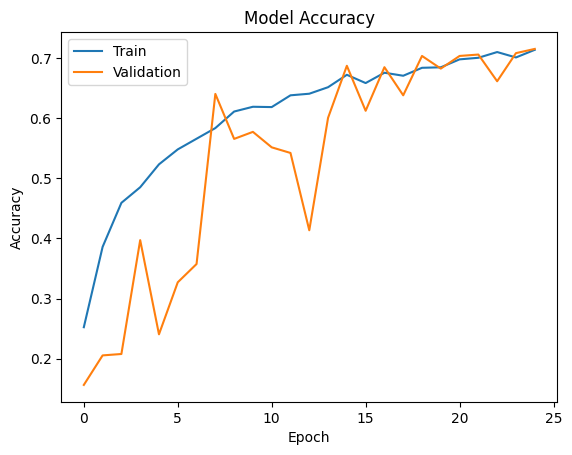

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [85]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 0s - loss: 0.9480 - accuracy: 0.7200 - 77ms/epoch - 5ms/step


We can observe that our accuracy has improved compared to our previous model.



In [86]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


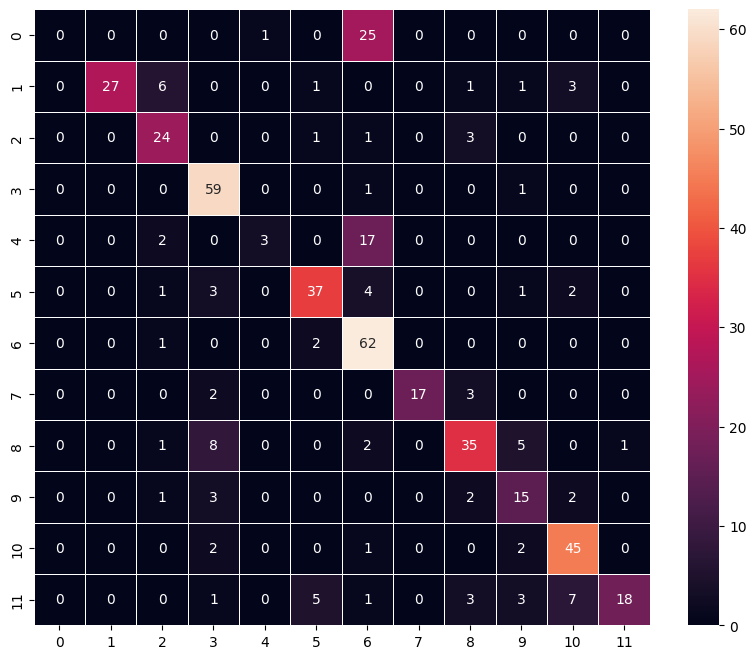

In [87]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**



*   The confusion matrix appears to be improving as well
*   There is still some confusion with the 6th class is the most confused class among all.
*   We can observe that this model has outperformed our previous model.

**Transfer Learning using VGG16**

Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [88]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [89]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [90]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-

In [91]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,
                    class_weight=class_weights)

Epoch 1/25
60/60 [==============================] - 11s 118ms/step - loss: 2.7912 - accuracy: 0.1581 - val_loss: 2.3163 - val_accuracy: 0.2079
Epoch 2/25
60/60 [==============================] - 6s 92ms/step - loss: 2.5564 - accuracy: 0.2176 - val_loss: 2.1791 - val_accuracy: 0.2897
Epoch 3/25
60/60 [==============================] - 6s 97ms/step - loss: 2.3366 - accuracy: 0.2990 - val_loss: 1.9842 - val_accuracy: 0.3341
Epoch 4/25
60/60 [==============================] - 6s 95ms/step - loss: 2.1317 - accuracy: 0.3402 - val_loss: 1.8579 - val_accuracy: 0.3832
Epoch 5/25
60/60 [==============================] - 6s 93ms/step - loss: 1.9874 - accuracy: 0.3756 - val_loss: 1.7503 - val_accuracy: 0.3972
Epoch 6/25
60/60 [==============================] - 7s 114ms/step - loss: 1.8456 - accuracy: 0.4055 - val_loss: 1.6604 - val_accuracy: 0.4182
Epoch 7/25
60/60 [==============================] - 6s 94ms/step - loss: 1.7890 - accuracy: 0.4137 - val_loss: 1.6107 - val_accuracy: 0.4416
Epoch 8/25

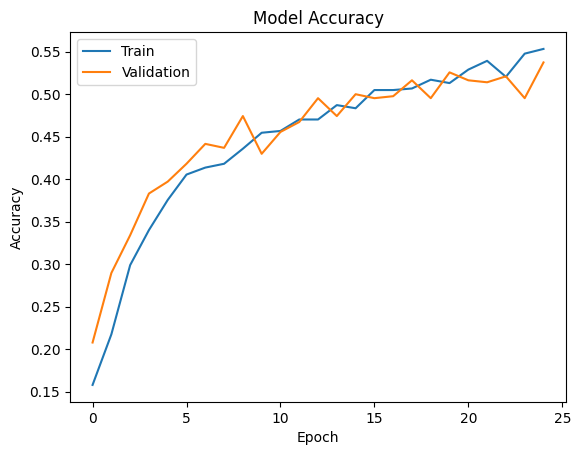

In [92]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [97]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)


15/15 - 1s - loss: 1.3111 - accuracy: 0.5432 - 1s/epoch - 82ms/step


In [98]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 1s 18ms/step


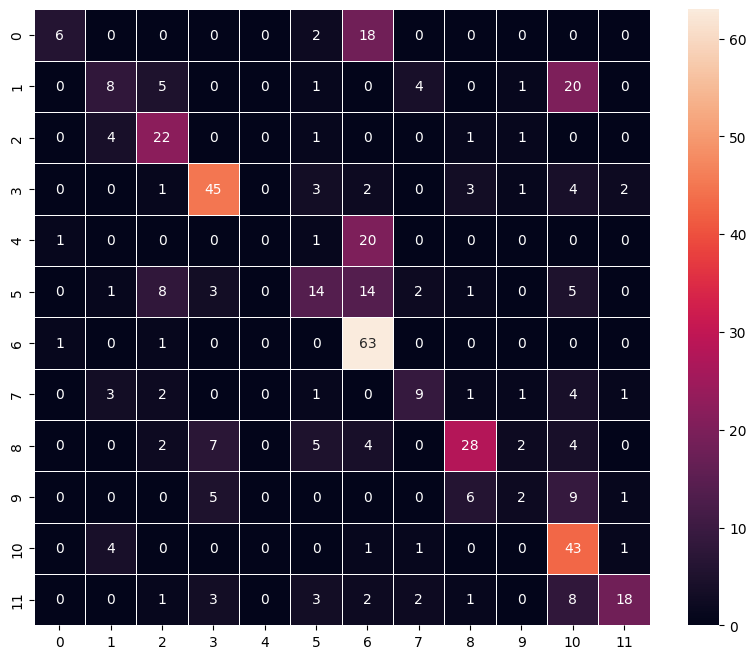

In [99]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


*   According to the confusion matrix and accuracy curve, the VGG16 model has outperformed Model-2.
*   Thus we can say that VGG16 is our best model and we can use this model to predict and visualize some test images.

**Visualizaing the prediction**

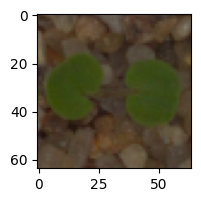

1/1 [==============================] - 0s 433ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


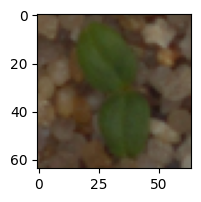

1/1 [==============================] - 0s 36ms/step
Predicted Label ['Cleavers']
True Label Cleavers


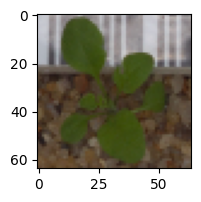

1/1 [==============================] - 0s 28ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [100]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36]) 

**Conclusion**


*   The test accuracy of the VGG16 model is 54%.
*   We can observe from the confusion matrix of all the models that the Model-2 model was the best model because it has the highest accuracy value 72%
*   Data Augmentation has also helped in improving the model.